In [ ]:
# Data avaialable at https://drive.google.com/file/d/1Tksi8UyzW-drFWd7maGr7MoHVa-VHQCO/view?usp=sharing
# Downloaded the testdata & uploaded in Git Hub to access it
#Dowloading the data set from github repository
!git clone https://github.com/nitin1291/OLID---NLP

Cloning into 'OLID---NLP'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 10 (delta 0), pack-reused 0
Receiving objects: 100% (10/10), 832.80 KiB | 2.22 MiB/s, done.


In [ ]:
#importing all the required libraries
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Read the dataset and other required test files


# Load the training set
train_df= pd.read_csv("/content/OLID---NLP/olid-training-v1.0.tsv",sep="\t")

# Load the test set
test_df_STA= pd.read_csv("/content/OLID---NLP/testset-levela.tsv",sep="\t")
test_df_STB = pd.read_csv("/content/OLID---NLP/testset-levelb.tsv",sep="\t")

# Load the labels
labels_STA = pd.read_csv("/content/OLID---NLP/labels-levela.csv", header=None)
labels_STB = pd.read_csv("/content/OLID---NLP/labels-levelb.csv", header=None)

# Name the columns as there are no headers in labels
labels_STA.rename(columns={0: 'id', 1: 'off_non'}, inplace=True)
labels_STB.rename(columns={0: 'id', 1: 'tin_unt'}, inplace=True)

# Merge the labels with the test dataset
test_df_STA= test_df_STA.merge(labels_STA, on='id')
test_df_STB = test_df_STB.merge(labels_STB, on='id')
train_df.head() # raw data

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [ ]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
wnl = WordNetLemmatizer()
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    word_tokens = word_tokenize(text)  # Tokenize
    filtered_text = [wnl.lemmatize(word, pos="v") for word in word_tokens if word not in stop_words] #lemmatize
    return ' '.join(filtered_text)

# Apply preprocessing to the tweet column
train_df['cleaned_tweet'] = train_df['tweet'].apply(preprocess_text)
test_df_STA['cleaned_tweet'] = test_df_STA['tweet'].apply(preprocess_text)
test_df_STB['cleaned_tweet'] = test_df_STB['tweet'].apply(preprocess_text)

In [ ]:
#SUB-TASK A - Offensive language identification;
# Create a bag-of-words model
vectorizer = CountVectorizer()

X_train = train_df['cleaned_tweet']
y_train_STA = train_df['subtask_a']
X_train_transformed = vectorizer.fit_transform(X_train) # Transform text data to numerical features

X_test = test_df_STA['cleaned_tweet']
X_test_transformed = vectorizer.transform(X_test)
y_test = test_df_STA['off_non']

In [ ]:
# Create and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_transformed, y_train_STA)

MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7988372093023256


Classification Report:
              precision    recall  f1-score   support

         NOT       0.84      0.89      0.86       620
         OFF       0.67      0.56      0.61       240

    accuracy                           0.80       860
   macro avg       0.75      0.73      0.74       860
weighted avg       0.79      0.80      0.79       860

Micro Evaluation: Precision: 0.7988; Recall: 0.7988; F1-Score: 0.7988
Macro Evaluation: Precision: 0.7526; Recall: 0.7264; F1-Score: 0.7370


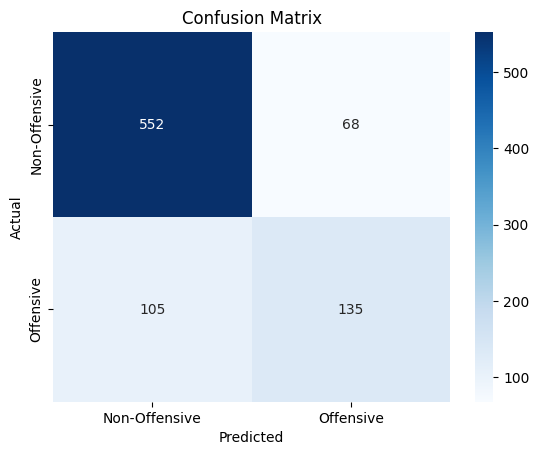

In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

from sklearn.metrics import precision_recall_fscore_support as prfs

p_micro, r_micro, f1_micro, _ = prfs(y_pred=y_pred, y_true=y_test, average="micro")
print("Micro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_micro, r_micro, f1_micro))

p_macro, r_macro, f1_macro, _ = prfs(y_pred=y_pred, y_true=y_test, average="macro")
print("Macro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_macro, r_macro, f1_macro))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Offensive', 'Offensive'], yticklabels=['Non-Offensive', 'Offensive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_transformed, y_train_STA)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict the test set results
y_pred = log_reg.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 80.93%


Classification Report:
              precision    recall  f1-score   support

         NOT       0.83      0.93      0.87       620
         OFF       0.73      0.51      0.60       240

    accuracy                           0.81       860
   macro avg       0.78      0.72      0.74       860
weighted avg       0.80      0.81      0.80       860

Micro Evaluation: Precision: 0.8093; Recall: 0.8093; F1-Score: 0.8093
Macro Evaluation: Precision: 0.7778; Recall: 0.7171; F1-Score: 0.7365


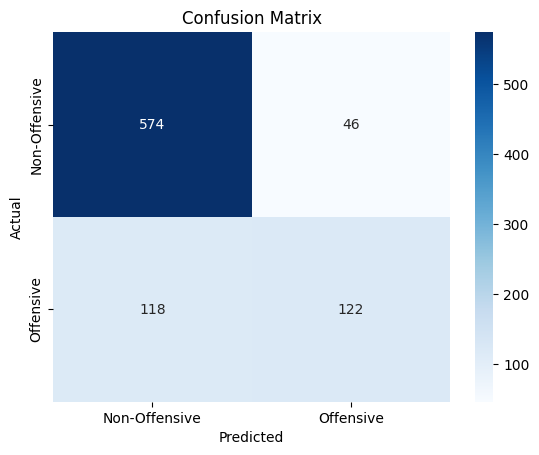

In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

from sklearn.metrics import precision_recall_fscore_support as prfs

p_micro, r_micro, f1_micro, _ = prfs(y_pred=y_pred, y_true=y_test, average="micro")
print("Micro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_micro, r_micro, f1_micro))

p_macro, r_macro, f1_macro, _ = prfs(y_pred=y_pred, y_true=y_test, average="macro")
print("Macro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_macro, r_macro, f1_macro))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Offensive', 'Offensive'], yticklabels=['Non-Offensive', 'Offensive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Testing the model with Sample data.
sample_data = {
    'tweet': [
        'I love this car!',
        'This is so bad and annoying',
        'What a fantastic view',
        'I hate this product, it is awful',
        'This is offensive and rude',
        'Such a wonderful experience'
    ],
    'label': [0, 1, 0, 1, 1, 0]
}

sample_df = pd.DataFrame(sample_data)
sample_df['tweet'] = sample_df['tweet'].apply(preprocess_text)
sample_pred = nb_model.predict(vectorizer.transform(sample_df['tweet']))

sample_df['predicted_label'] = sample_pred
print(sample_df)

                  tweet  label predicted_label
0              love car      0             NOT
1             bad annoy      1             OFF
2        fantastic view      0             NOT
3    hate product awful      1             OFF
4        offensive rude      1             OFF
5  wonderful experience      0             NOT


In [ ]:
# Sub-task B - Automatic categorization of offense types;
df_filtered_stb = train_df.dropna(subset=['subtask_b']) # filtering non null values

# Create a bag-of-words model
# vectorizer = CountVectorizer()

# Preprocess and Vectorize the data using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_transformed = vectorizer.fit_transform(df_filtered_stb['cleaned_tweet']) # Transform text data to numerical features

y_train_STB = df_filtered_stb['subtask_b']

X_test_transformed = vectorizer.transform(test_df_STB['cleaned_tweet'])
y_test = test_df_STB['tin_unt']


In [ ]:
# Create and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_transformed, y_train_STB)

MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
y_test.value_counts()

Accuracy: 0.8875


tin_unt
TIN    213
UNT     27
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

         TIN       0.89      1.00      0.94       213
         UNT       0.00      0.00      0.00        27

    accuracy                           0.89       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.79      0.89      0.83       240

Micro Evaluation: Precision: 0.8875; Recall: 0.8875; F1-Score: 0.8875
Macro Evaluation: Precision: 0.4437; Recall: 0.5000; F1-Score: 0.4702


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

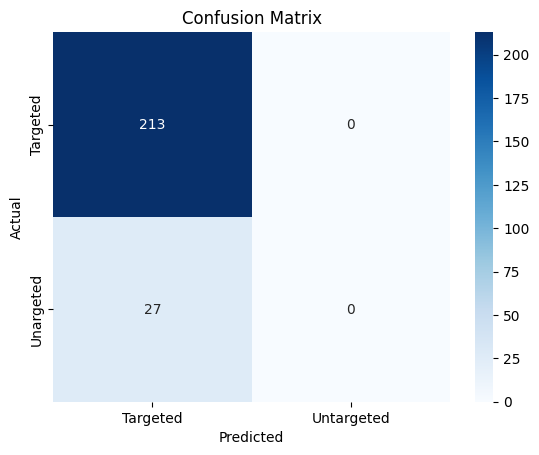

In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

from sklearn.metrics import precision_recall_fscore_support as prfs

p_micro, r_micro, f1_micro, _ = prfs(y_pred=y_pred, y_true=y_test, average="micro")
print("Micro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_micro, r_micro, f1_micro))

p_macro, r_macro, f1_macro, _ = prfs(y_pred=y_pred, y_true=y_test, average="macro")
print("Macro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_macro, r_macro, f1_macro))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Targeted', 'Untargeted'], yticklabels=['Targeted', 'Unargeted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_transformed, y_train_STB)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict the test set results
y_pred = log_reg.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
y_test.value_counts()

Accuracy: 88.75%


tin_unt
TIN    213
UNT     27
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

         TIN       0.89      1.00      0.94       213
         UNT       0.50      0.04      0.07        27

    accuracy                           0.89       240
   macro avg       0.70      0.52      0.50       240
weighted avg       0.85      0.89      0.84       240

Micro Evaluation: Precision: 0.8875; Recall: 0.8875; F1-Score: 0.8875
Macro Evaluation: Precision: 0.6954; Recall: 0.5162; F1-Score: 0.5045


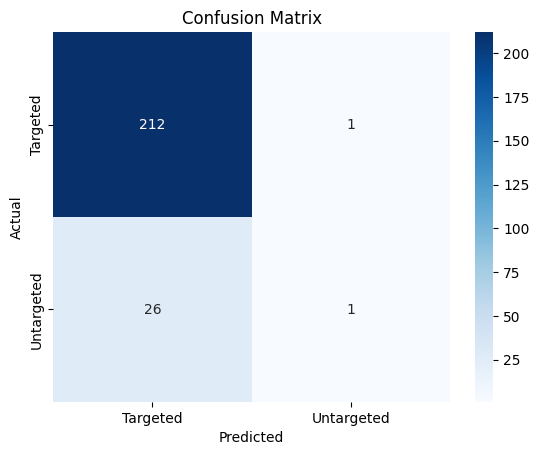

In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

from sklearn.metrics import precision_recall_fscore_support as prfs

p_micro, r_micro, f1_micro, _ = prfs(y_pred=y_pred, y_true=y_test, average="micro")
print("Micro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_micro, r_micro, f1_micro))

p_macro, r_macro, f1_macro, _ = prfs(y_pred=y_pred, y_true=y_test, average="macro")
print("Macro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_macro, r_macro, f1_macro))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Targeted', 'Untargeted'], yticklabels=['Targeted', 'Untargeted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#logistic Regression with Class Weiths for handling unbalanced Datasets
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_STB_encoded = le.fit_transform(y_train_STB)
y_test_encoded = le.fit_transform(y_test)
class_weights = dict(zip(np.unique(y_train_STB_encoded),
                         len(y_train_STB_encoded) / (len(np.unique(y_train_STB_encoded)) * np.bincount(y_train_STB_encoded))))

log_reg = LogisticRegression(class_weight=class_weights, random_state=42)
log_reg.fit(X_train_transformed, y_train_STB_encoded)

LogisticRegression(class_weight={0: 0.5675954592363261, 1: 4.198473282442748},
                   random_state=42)

In [ ]:
# Predict the test set results
y_pred_2nd_trial = log_reg.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_2nd_trial)
print(f'Accuracy: {accuracy * 100:.2f}%')
y_test.value_counts()

Accuracy: 83.33%


tin_unt
TIN    213
UNT     27
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       213
           1       0.36      0.59      0.44        27

    accuracy                           0.83       240
   macro avg       0.65      0.73      0.67       240
weighted avg       0.88      0.83      0.85       240

Micro Evaluation: Precision: 0.8333; Recall: 0.8333; F1-Score: 0.8333
Macro Evaluation: Precision: 0.6496; Recall: 0.7282; F1-Score: 0.6732


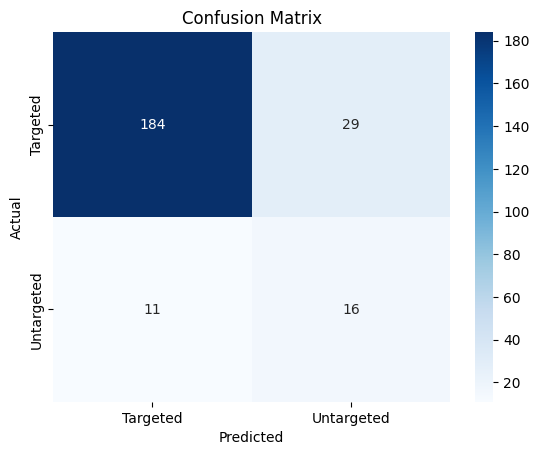

In [ ]:
print('Classification Report:')
print(classification_report(y_test_encoded, y_pred_2nd_trial))

from sklearn.metrics import precision_recall_fscore_support as prfs

p_micro, r_micro, f1_micro, _ = prfs(y_pred=y_pred_2nd_trial, y_true=y_test_encoded, average="micro")
print("Micro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_micro, r_micro, f1_micro))

p_macro, r_macro, f1_macro, _ = prfs(y_pred=y_pred_2nd_trial, y_true=y_test_encoded, average="macro")
print("Macro Evaluation: Precision: %.4f; Recall: %.4f; F1-Score: %.4f" % (p_macro, r_macro, f1_macro))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_2nd_trial)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Targeted', 'Untargeted'], yticklabels=['Targeted', 'Untargeted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()